In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
relation = pd.read_table("./relation.txt")

In [ ]:
Gene = pd.read_table("./Gene.txt")
Disease = pd.read_table("./Disease.txt")

In [ ]:
relation.columns = ['Gene', 'Disease', 'Relation']
relation['count'] = 1

In [ ]:
relation = relation.groupby(['Gene', 'Disease'])['count'].sum().reset_index().sort_values('count', ascending = False).reset_index(drop = True)

In [ ]:
relation.drop(relation.head(2).index, inplace =True)

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(set(relation['Gene']))
G.add_nodes_from(set(relation['Disease']))
edges = [(x, y) for x, y in zip(relation['Gene'], relation['Disease'])]
G.add_edges_from(edges) 

In [ ]:
pos = nx.spring_layout(G)
sizes_node = [0.5 + G.degree(v) * 0.5 for v in G.nodes()] 
sizes_color = [100 + G.degree(v) * 100 for v in G.nodes()] 
nx.draw(G, pos=pos, with_labels=False, node_size=sizes_node, node_color=sizes_color, 
            edge_color='#75664d', width=0.05,
            alpha=0.7, font_size=0.25,
            arrowsize=0.5) 
plt.savefig('./network.png', dpi = 250)

In [ ]:
sorted(dict(G.degree).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [ ]:
bet_con = dict(nx.betweenness_centrality(G))
bet_con = sorted(dict(bet_con).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [82]:
hub = list()
for i in bet_con[:494]:
    hub.append(i[0])

In [84]:
k = G.subgraph(hub)

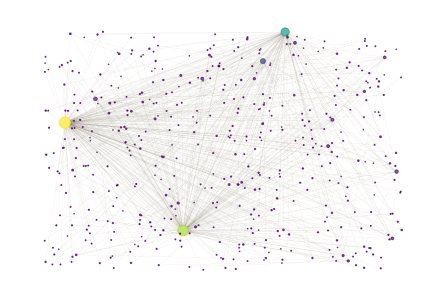

In [88]:
pos = nx.random_layout(k)
sizes_node = [0.5 + k.degree(v) * 0.5 for v in k.nodes()] 
sizes_color = [100 + k.degree(v) * 100 for v in k.nodes()] 
nx.draw(k, pos =pos, with_labels=False, node_size=sizes_node, node_color=sizes_color, 
            edge_color='#75664d', width=0.05,
            alpha=0.7, font_size=0.25,
            arrowsize=0.5) 
plt.savefig('./network_hub.png', dpi = 250)